# Why are numerical methods useful for physicists?

### A small introduction
When I was an undergraduate at the University of Nottingham, a substantial element of my degree involved the use of numerical methods to solve problems that we unsolvable by standard analytical techinques. Sure, it is important as a scientist to visualise the behaviour of functions, but one can do this very easily using programs such as Desmos or Geogebra. Why do I need to learn numerical methods for? So, my purpose in this introductory lesson is to demostrate the importance of numerical methods as a toolkit for you, as opposed to a means to an end. Know that numerical methods are not a simple (pardon my language) bullshit techinque to solve problems.

### Who are these notes written for?
It is our purpose to write these notes as being accessible to all levels of coder (primarily in python - though the principles of the data structures and numerical methods are universal). At many times, numerical methods rely on the principle of recursion, which one can indeed perform by hand or on a calculator. There is however, a limit to which a human can perform calculations which cannot simply be surpassed by the computational strength of a machine. It is thus suggested that you should consult a text which covers introductory concepts in Python, Java or C++ or whichever language (suitable for scientific computing) you choose. We will often use conditional statements such as `if`, `elif`, `else` along with their logical operators such as `==`or `!=` alongside loops such as `for` and `while`. Understanding when and how to use these tools will greatly improve your experience of these notes, so it's a good idea to keep reading and understanding how to use them. 

We suggest using Spyder IDE (integrated development environment) and Jupyter for scientific computing. This is because they come prepackaged with **modules** suitable to our ultimate goals of understanding numerical methods.   

# Limiting behaviour
Cast yourself back to the first time you were introduced to the concept of a derivative in Maths class. Suppose you have the simple function $f(x)=x^2$. We would like to determine the gradient of this curve at some arbitrary point $(x, x^2)$. The standard technique to perform this calculation is to take a macroscopic change in $x$, such as $\Delta x$ and to work out the gradient of a chord of this curve. For instance, one would perform the following janky calculation: 

$$\frac{\Delta f}{\Delta x} = \frac{f(x+\Delta x)-f(x)}{\Delta x}$$
However, this is not truely the gradient of the curve at the point $x$, the true gradient is achieved by making the step-size $\Delta x$ smaller and smaller by taking a 'limit'...
$$\frac{df}{dx} = \lim_{\Delta x\rightarrow 0}\frac{\Delta f}{\Delta x}$$
For our partcular $f(x)$, we find the result, 
$$\frac{df}{dx} = 2x$$

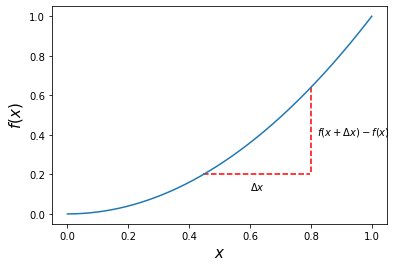

In [177]:
# This code just generates the figure seen below. 

import numpy as np 
import matplotlib.pyplot as plt

x = np.linspace(0, 1, 1000)
f = x**2

plt.axvline(0.8, ymin=0.24, ymax=0.8**2, linestyle='--', color='red')
plt.axhline(0.2, xmin=0.45, xmax=0.77, linestyle='--', color='red')
plt.text(0.82, 0.4, '$f(x+\Delta x)-f(x)$', fontsize=10)
plt.text(0.6, 0.12, '$\Delta x$', fontsize=10)
plt.xlabel('$x$', fontsize=15)
plt.ylabel('$f(x)$', fontsize=15)
plt.plot(x,f)

"*Great... I know all of this, what of it?*"

The point of this demonstration is the idea that in numerical methods, we are going to constantly use this idea that a decrease in the step-size will result in a more and more refined calculation of the particular quantity of interest.

For another common numerical example, we might want to evaluate an integral. I would personally say that integration is a procedure, which lends itself to more flavours of numerical methods which we will become very well acquainted with soon enough. A simple example of would be the integration of $f(x) = \sin(x)$ from $x=0$ to $x=\pi$. 

$$I =\int_{0}^{\pi}\sin(x)dx$$

This is an integral that can be solved by hand
$$I = [-\cos(x)]_{0}^{\pi}$$
$$= 1-(-1) = 2$$

In [197]:
# The part of this code that is important is the integrator
# function, outlined by the -- line.

import pandas as pd
       
def dict(dx,I): 
    return {'dx': dx, 'I': I}

#----------------------------------------------------------#
def integrator(dx): 
    cumsum = 0
    x = np.arange(0, np.pi, dx)
    y = np.sin(x)

    for j in range(len(x)): 
        cumsum += y[j]*dx
        
    return cumsum
#----------------------------------------------------------#    

dx = [0.1, 0.01, 0.001]
dicts = []

for i in range(len(dx)):     
    I = integrator(dx[i])
    dicts.append(dict(dx[i], I))

print(pd.DataFrame(dicts))

      dx         I
0  0.100  1.999548
1  0.010  1.999990
2  0.001  2.000000


So we see from this simple demonstration of numerical integration, using a pretty rudimentary method of approximating rectangles, that decreasing the step-size $dx$ causes $I$ to converge to its true value already at $dx = 0.001$. (In reality, this is a lie... the tablular representation rounds the value to the closest significant figure, however, it stands that the value of $I$ converges on $I = 2$. We see this in the print statement of the next block of code). 

In [170]:
I = integrator(0.001)
print(f'I = {I}')

I = 1.99999995404099


We see that if we were to perform this calculation at $dx = 0.0001$, that we would have an even better value. Let's try:

In [171]:
I = integrator(0.0001)
print(f'I = {I}')

I = 1.999999998673668


All of this is to say that in the limit of an infinitesimal $dx$, our value will converge on the true answer. This demonstrates the idea of **Limiting Behaviour**. Imagine that $I$ is a function of $dx$. For a particular choice of $dx$ as an input, we can show a plot of convergence of the integral as we decrease the size of $dx$. 

Text(0, 0.5, '$I$')

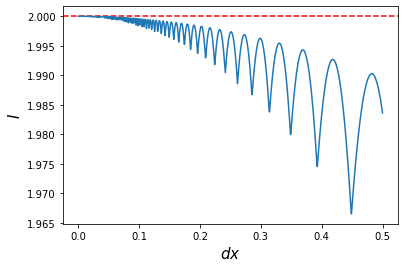

In [198]:
# This code block is written to demonstrate what happens when 
# one continues to decrease the value of dx.

dxLinspace = np.linspace(0.0001, 0.5, 1000)
integrandsArray = []

for i in range(len(dxLinspace)): 
    integrandsArray.append(integrator(dxLinspace[i]))

plt.axhline(2, color='red', linestyle="--")
plt.plot(dxLinspace, integrandsArray)
plt.xlabel('$dx$', fontsize=15)
plt.ylabel('$I$', fontsize=15)

In the above figure, we see that as $dx$ becomes smaller, that the value of $I$ approaches the theoretical calculation $I=2$. This shows the critical convergence in the calculation as we increase the precision of the integration step-size.

Convergence is our friend in numerical calculations. It is a vital indicator of the behaviour of the calculation we are performing. 

# Problems

# Exercise 1
One of the most important skills in numerical methods is to get a feel for how to represent data. Plotting graphs of relevant quantities is a skill in itself. Remember that a picture can speak 1000 words, it's important to realise that your plot should tell a story. It should complement the text you are using to explain your thoughts. In this problem, we will learn how to use `matplotlib.pyplot` to draw a graph of a function of our choice. Follow the steps below

- At the top of your python file or in the code block below type: `import matplotlib.pyplot as plt`(this will make the `pyplot` module available in your file with a shortcut `plt` which we will use - this is needed to create plots).


- Next we need to do the same for the `numpy` module. Type the following: `import numpy as np`. 


- NumPy contains many mathematical functions such as $\sin(x)$, $\exp(x)$ as well as some important methods and functions. NumPy and Matplotlib are two of the most commonly used packages in Numerical Methods. 


- Now that we have the required modules, we need to create a number-line. Define a variable `x` which is equal to `np.linspace(min, max, num)`. `linspace` is a numpy method which takes an input range and a number, $n$. The result is a line of $n$ evenly-spaced points. These values will define the $x$-axis of our graph. To read more about `linspace` check out the [documentation](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html). 


- Next your chosen function comes into play. We can construct simple functions by using the following operators $\times$=`*`, $\div$=`/`, $+$=`+`, $-$=`*-`and $x^2$ = `x**2`. Try to combine functions using these operators. Furthermore, try using np.sin(x), np.cos(x) or np.exp(x). Set a variable `y` equal to this function of your choice. 

- To plot the function, write the line: `plt.plot(x,y)` - this plots the function. 

- Labelling axes are vital to the reader of your new graph, give them a simple label such as "x" or "y". 
- To label the horizontal axis, write: `plt.xlabel('x')`
- To label the vertical axis, write: `plt.ylabel('y')`

And that's it! Nice job plotting your first function in python!

In [ ]:
# Plot your graph here or in your chosen IDE.








# Exercise 2
Write simple code in python to calculate the integral
$$I = \int_{0}^{1}x^2dx$$
The actual answer should be $I = \frac{1}{3}$. There is no need to be too elaborate, just try to achieve $I$ to a suitable level of precision such as 2 significant figures. (Hint, you may consider modifying the `integrator` function used in a code block above).

In [206]:
# Write your integral calculation here.










0.3328329998333337
